In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid world parameters
num_rows = 4
num_cols = 4
num_states = num_rows * num_cols
num_actions = 4
num_episodes = 500
gamma = 0.9

# Define rewards, goal state, and obstacles
rewards = np.random.randint(1, 10, num_states)
goal_state = num_states - 1
obstacles = [5, 7, 10]
rewards[goal_state] = 10
for obstacle in obstacles:
    rewards[obstacle] = -10

## **Define grid world functions**


In [62]:
def state_to_coords(state):
    row = state // num_cols
    col = state % num_cols
    return row, col

def coords_to_state(row, col):
    return row * num_cols + col

def step(state, action):
    row, col = state_to_coords(state)
    if action == 0:  # Up
        row = max(row - 1, 0)
    elif action == 1:  # Down
        row = min(row + 1, num_rows - 1)
    elif action == 2:  # Left
        col = max(col - 1, 0)
    elif action == 3:  # Right
        col = min(col + 1, num_cols - 1)
    next_state = coords_to_state(row, col)
    return next_state, rewards[next_state]


## **Policy Evaluation**

In [63]:
def policy_evaluation(policy, gamma=0.9, theta=1e-6):
    V = np.zeros(num_states)
    while True:
        delta = 0
        for s in range(num_states):
            v = V[s]
            action = policy[s]
            next_state, reward = step(s, action)
            V[s] = reward + gamma * V[next_state]
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    return V

##**Policy Iteration**

In [64]:
def policy_iteration(gamma=0.9):
    policy = np.random.randint(0, num_actions, num_states)
    while True:
        V = policy_evaluation(policy, gamma)
        policy_stable = True
        for s in range(num_states):
            old_action = policy[s]
            q_values = [step(s, a)[1] + gamma * V[step(s, a)[0]] for a in range(num_actions)]
            policy[s] = np.argmax(q_values)
            if old_action != policy[s]:
                policy_stable = False
        if policy_stable:
            break
    return policy, V

# Perform policy iteration
optimal_policy_iteration, optimal_values_iteration = policy_iteration()

# Perform policy evaluation
random_policy = np.random.randint(0, num_actions, num_states)
optimal_values_evaluation = policy_evaluation(random_policy)

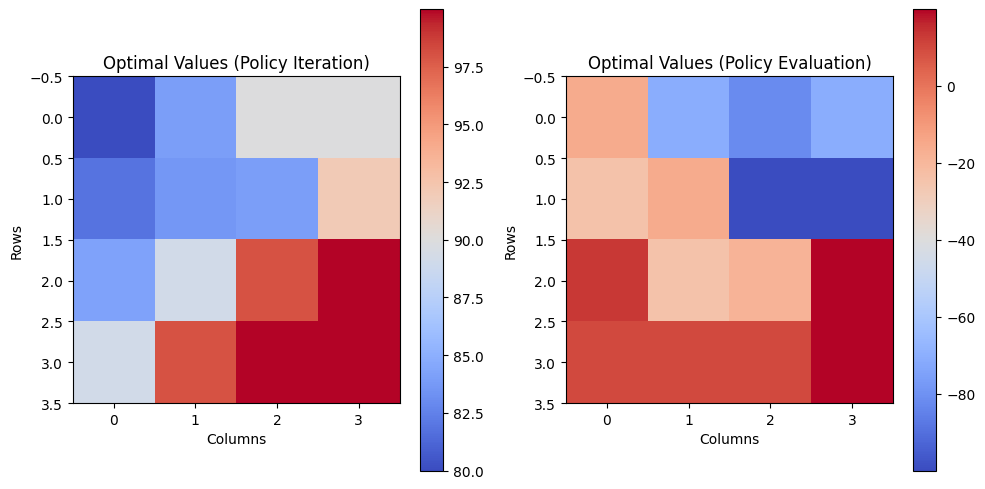

In [65]:

# Plotting the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(optimal_values_iteration.reshape((num_rows, num_cols)), cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Optimal Values (Policy Iteration)')
plt.xlabel('Columns')
plt.ylabel('Rows')

plt.subplot(1, 2, 2)
plt.imshow(optimal_values_evaluation.reshape((num_rows, num_cols)), cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Optimal Values (Policy Evaluation)')
plt.xlabel('Columns')
plt.ylabel('Rows')

plt.tight_layout()
plt.show()

In [66]:
# Display the final optimal policy and optimal values for policy iteration
optimal_policy_matrix_iteration = np.array(['U', 'D', 'L', 'R'])[optimal_policy_iteration]
optimal_policy_matrix_iteration = optimal_policy_matrix_iteration.reshape((num_rows, num_cols))

print("Final Optimal Policy (Policy Iteration):")
print(optimal_policy_matrix_iteration)
print("\nOptimal Values (Policy Iteration):")
print(optimal_values_iteration.reshape((num_rows, num_cols)))

# Display the final optimal values for policy evaluation
optimal_values_matrix_evaluation = optimal_values_evaluation.reshape((num_rows, num_cols))
print("\nOptimal Values (Policy Evaluation):")
print(optimal_values_matrix_evaluation)


Final Optimal Policy (Policy Iteration):
[['U' 'R' 'R' 'U']
 ['D' 'R' 'U' 'D']
 ['D' 'D' 'D' 'D']
 ['R' 'R' 'R' 'D']]

Optimal Values (Policy Iteration):
[[79.99999281 83.99999192 89.99999192 89.99999192]
 [81.85199102 83.59999273 83.99999273 91.99999102]
 [84.27999102 89.19999102 97.99999102 99.99999102]
 [89.19999102 97.99999102 99.99999102 99.99999102]]

Optimal Values (Policy Evaluation):
[[-15.78947368 -70.79999102 -81.99999102 -70.79999192]
 [-24.21052632 -15.78947368 -99.99999102 -99.99999102]
 [ 12.9999991  -24.21052632 -18.78947368  19.9999982 ]
 [  9.9999991    9.9999991    9.99999919  19.99999838]]
